In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv("home price.csv")

In [114]:
df.isnull().sum()

area     0
price    0
dtype: int64

In [115]:
df.isnull().any()

area     False
price    False
dtype: bool

In [116]:
df.describe()

,area,price
count,10.000000,10.000000
mean,3230.000000,59350.000000
std,1098.534377,24154.652186
min,1200.000000,17000.000000
25%,2625.000000,43750.000000
50%,3100.000000,58750.000000
75%,3900.000000,71000.000000
max,5000.000000,100000.000000


In [118]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,4500,86000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


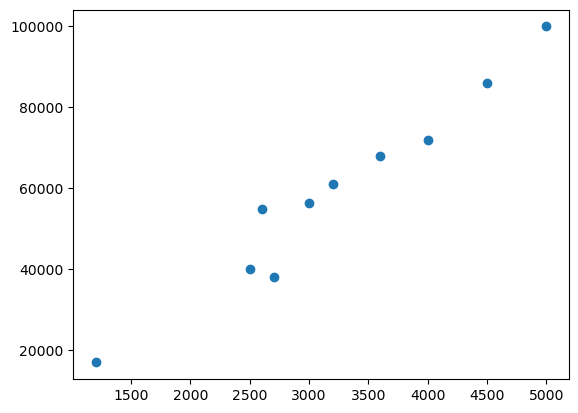

In [119]:
plt.scatter(df["area"], df["price"])
plt.show()

In [120]:
x = df[["area"]] # independant variables 
y = df["price"] # dependant variables

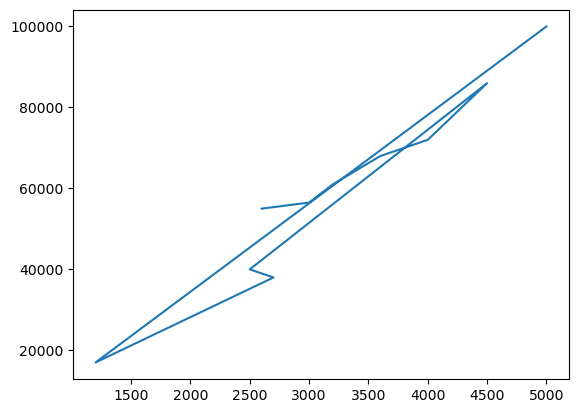

In [121]:
plt.plot(x,y)

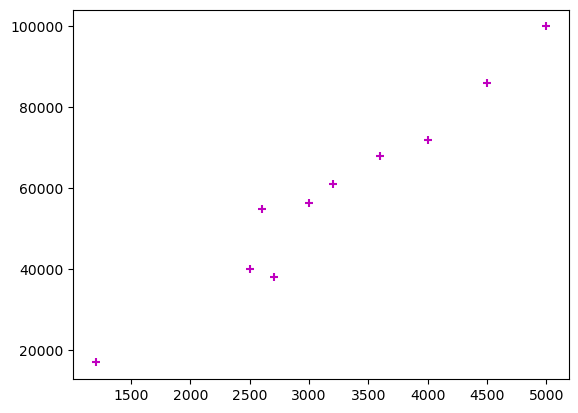

In [122]:
plt.scatter(x,y, marker="+", c="m")

### Train Test Split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=2)

#### Using Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regr = LinearRegression()

In [127]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [128]:
regr.predict(xtest) # then it'll print ytest, that means price of the house 

array([76881.98103267, 54774.49947313, 87935.72181243])

In [129]:
regr.predict([[5000]])

D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98989.4625922])

### Draw a best fit lline

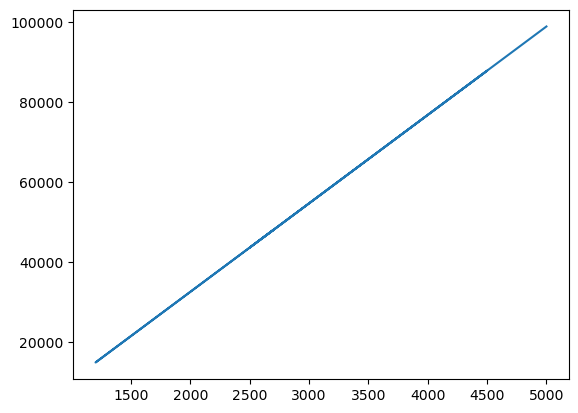

In [130]:
plt.plot(x, regr.predict(x)) # or it could be "regr.predict(df[["area"]])"

In [131]:
regr.predict(df[["area"]])

array([45931.50684932, 54774.49947313, 59195.99578504, 68038.98840885,
       76881.98103267, 87935.72181243, 43720.75869336, 48142.25500527,
       14981.03266596, 98989.4625922 ])

In [132]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     86000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

In [133]:
regr.predict(x)

array([45931.50684932, 54774.49947313, 59195.99578504, 68038.98840885,
       76881.98103267, 87935.72181243, 43720.75869336, 48142.25500527,
       14981.03266596, 98989.4625922 ])

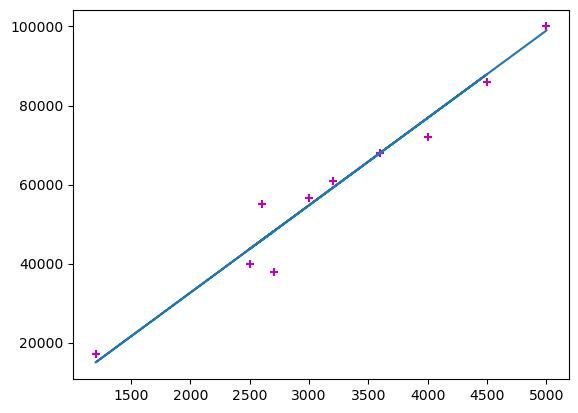

In [134]:
plt.scatter(x,y,marker="+",c="m")
plt.plot(x, regr.predict(df[["area"]])) # or it could be "regr.predict(df[["area"]])"

In [135]:
m = regr.coef_

In [136]:
c = regr.intercept_

In [137]:
m

array([22.10748156])

In [138]:
c

-11547.945205479467

In [139]:
xtest

,area
4,4000
1,3000
5,4500


In [148]:
y = m*4750 + c

In [149]:
y

array([93462.59220232])

### Accuracy check

In [150]:
from sklearn.metrics import r2_score

In [151]:
predictxtest = regr.predict(xtest)

In [152]:
predictxtest

array([76881.98103267, 54774.49947313, 87935.72181243])

In [153]:
ytest

4    72000
1    56500
5    86000
Name: price, dtype: int64

In [154]:
xtest

,area
4,4000
1,3000
5,4500


In [155]:
accuracy = r2_score(ytest, predictxtest)
accuracy

0.9298321244393255

In [156]:
print(f"Accuracy level is {accuracy} between 0 - 1")

Accuracy level is 0.9298321244393255 between 0 - 1


# THE END